Source: https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
import pandas as pd

# load the data trainging set
X, y = load_breast_cancer(return_X_y=True)
data = load_breast_cancer()

In [2]:
!pip install shap

     |████████████████████████████████| 356 kB 2.1 MB/s eta 0:00:01
  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
  Created wheel for shap: filename=shap-0.39.0-cp38-cp38-macosx_10_9_x86_64.whl size=416649 sha256=45d59b5a5fb1924df5d636d2988baecd078babc7d0dd337a6b68399f787ef26c
  Stored in directory: /Users/snerur/Library/Caches/pip/wheels/3d/c9/06/734ed80d6d61fad331974bf62017b4ea6b33488082b9f5e67e
Successfully built shap


In [53]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestClassifier(max_depth=6, random_state=0,
                               class_weight='balanced',n_estimators=10)
model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=10,
                       random_state=0)

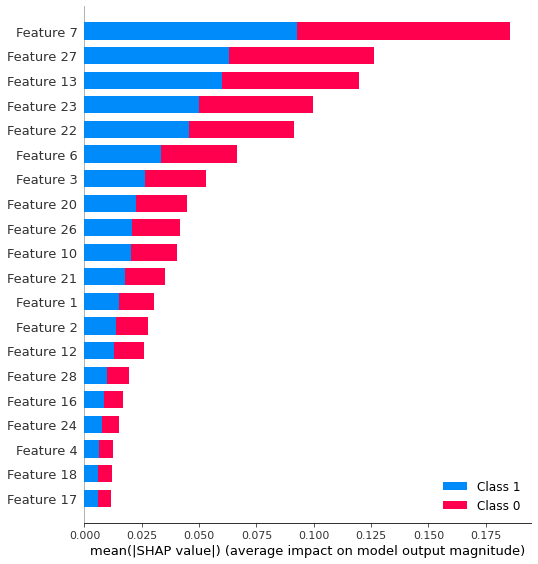

In [56]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

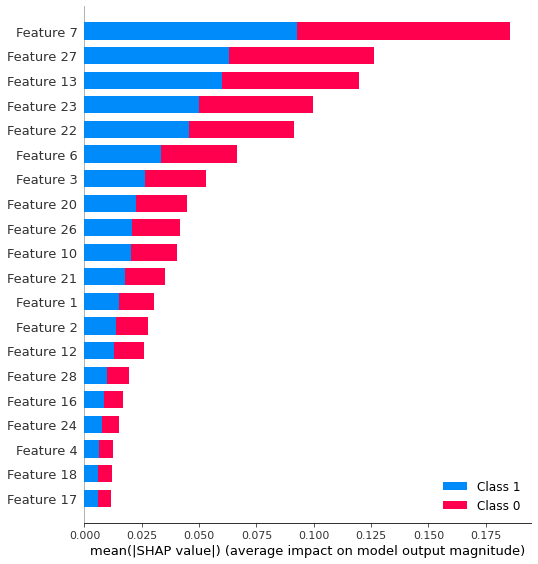

In [58]:
shap.summary_plot(shap_values, X_test)

Another example from: https://mlconference.ai/blog/tutorial-explainable-machine-learning-with-python-and-shap/

In [16]:
!pip install catboost

     |████████████████████████████████| 13.1 MB 978 kB/s eta 0:00:01


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import catboost as catboost
from catboost import CatBoostClassifier, Pool, cv
import shap

In [60]:
kickstarter = pd.read_csv("/Users/snerur/Dropbox/insy5378/kickstarter/ks-projects-201801.csv")

In [61]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [62]:
kickstarter = kickstarter[(kickstarter['state'] == 'failed') | (kickstarter['state'] == 'successful')]
kickstarter['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

In [63]:
kickstarter["state"] = kickstarter["state"].replace({"failed": 0, "successful": 1})

In [64]:
#select columns to use
kickstarter_first = kickstarter[
    [
        "category",
        "main_category",
        "currency",
        "deadline",
        "goal",
        "launched",
        "backers",
        "country",
        "state",
    ]
]

In [65]:
X = kickstarter_first[kickstarter_first.columns[:-1]]
y = kickstarter_first[kickstarter_first.columns[-1:]]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [67]:
model = CatBoostClassifier(
    random_seed=42, logging_level="Silent", iterations=150
)

In [68]:
categorical_features_indices = np.where(X.dtypes == 'object')[0]
categorical_features_indices

array([0, 1, 2, 3, 5, 7])

In [69]:
type(X_train)

pandas.core.frame.DataFrame

In [70]:
model.fit(
    X_train,
    y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test)
)

In [71]:
model.score(X_test, y_test)

0.9327665219488663

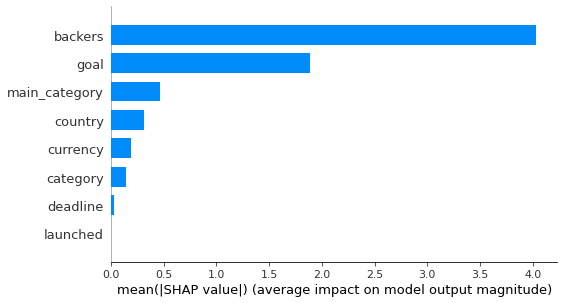

In [72]:
shap_values = model.get_feature_importance(
    Pool(X_test, label=y_test, cat_features=categorical_features_indices),
    type="ShapValues",
)
shap_values = shap_values[:, :-1]
 
 
shap.summary_plot(shap_values, X_test, plot_type="bar")

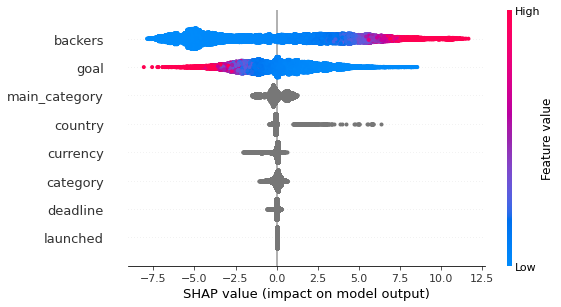

In [73]:
shap_values = model.get_feature_importance(
    Pool(X_test, label=y_test, cat_features=categorical_features_indices),
    type="ShapValues",
)
shap_values = shap_values[:, :-1]
 
 
shap.summary_plot(shap_values, X_test)

In [74]:
shap_values = model.get_feature_importance(
    Pool(X_test, label=y_test, cat_features=categorical_features_indices),
    type="ShapValues",
)
expected_value = shap_values[0, -1]
shap_values = shap_values[:, :-1]
shap.initjs()  
 
shap.force_plot(expected_value, shap_values[10, :], X_test.iloc[10, :])